In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df=pd.read_csv('StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
df.rename(columns={
    'race/ethnicity': 'race',
    'parental level of education': 'parent_edu',
    'test preparation course': 'test_prep',
    'math score': 'math',
    'reading score': 'reading',
    'writing score': 'writing'
}, inplace=True)


In [8]:
df.head()

,gender,race,parent_edu,lunch,test_prep,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Text(0.5, 1.0, 'Math Score Distribution')

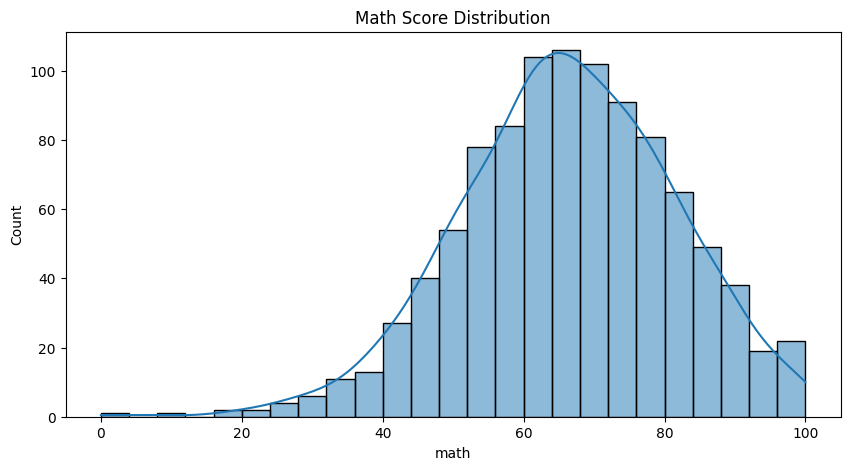

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['math'], kde=True)
plt.title('Math Score Distribution')


Text(0.5, 1.0, 'Gender Distribution')

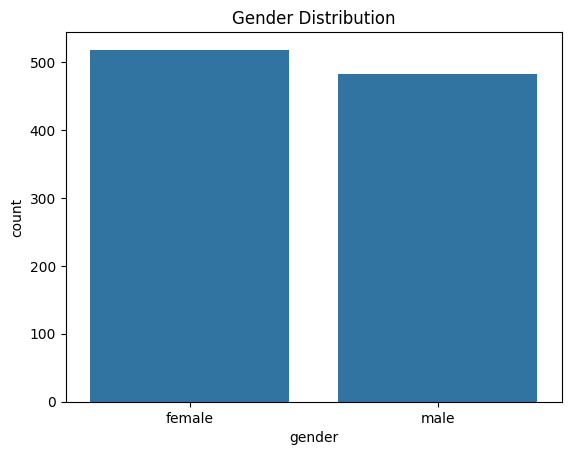

In [11]:
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')


Text(0.5, 1.0, 'Math Score by Gender')

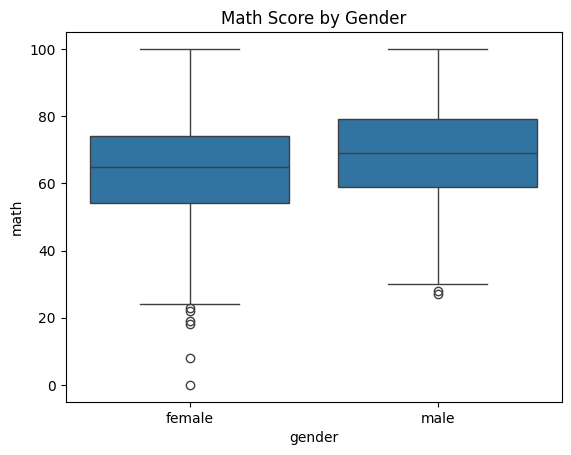

In [12]:
sns.boxplot(data=df, x='gender', y='math')
plt.title('Math Score by Gender')


<Axes: >

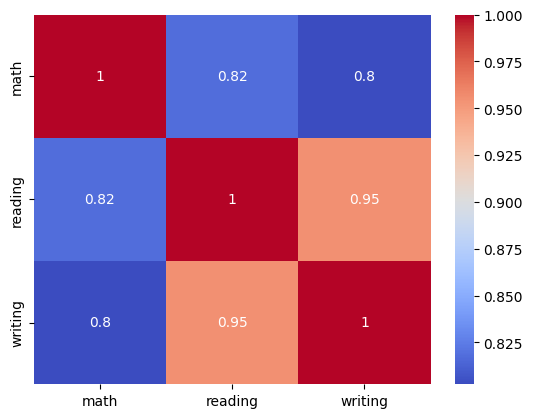

In [13]:
sns.heatmap(df[['math', 'reading', 'writing']].corr(), annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Effect of Test Prep on Math Score')

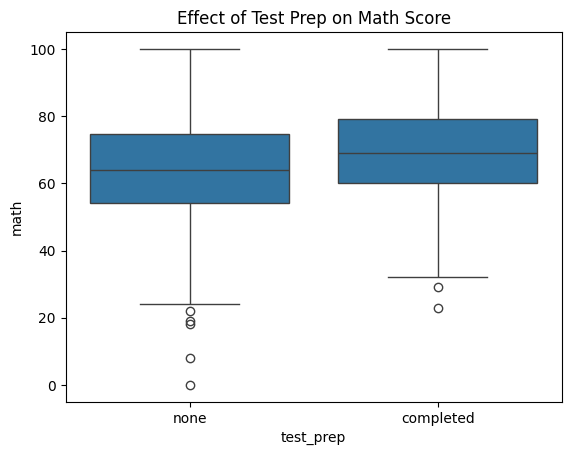

In [17]:
sns.boxplot(data=df, x='test_prep', y='math')
plt.title('Effect of Test Prep on Math Score')


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "master's degree"),
  Text(1, 0, "bachelor's degree"),
  Text(2, 0, "associate's degree"),
  Text(3, 0, 'some college'),
  Text(4, 0, 'some high school'),
  Text(5, 0, 'high school')])

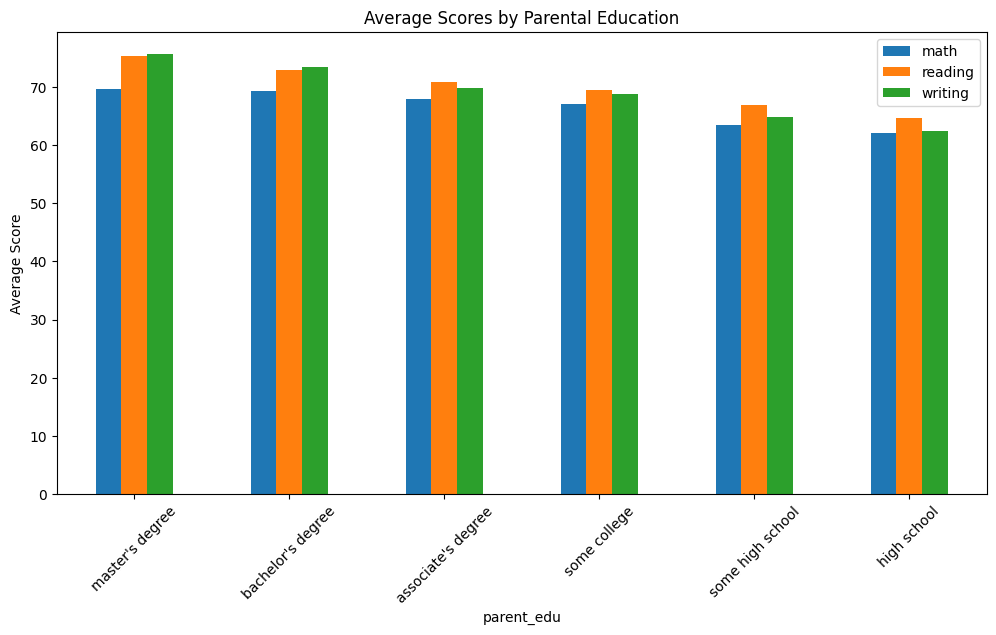

In [14]:
avg_scores = df.groupby('parent_edu')[['math', 'reading', 'writing']].mean().sort_values(by='math', ascending=False)
avg_scores.plot(kind='bar', figsize=(12,6))
plt.title('Average Scores by Parental Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
